In [1]:
from BEWaveform import BE_Spectroscopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
out = BE_Spectroscopy(14, 1, wave= "chirp", BE_smoothing=125, start = 0, 
        max = 10,
        min = -10,
        cycles = 3,
        points_per_cycle = 64)

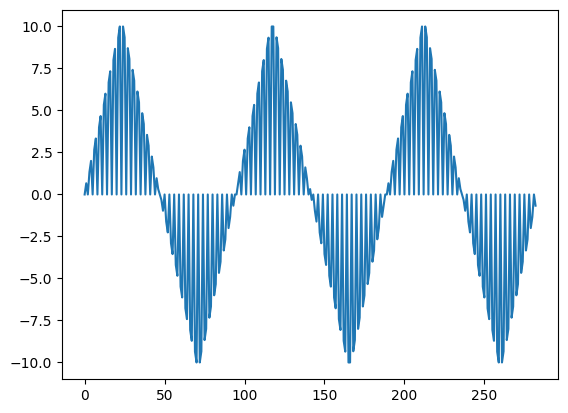

In [3]:
plt.plot(out.DC_wave)

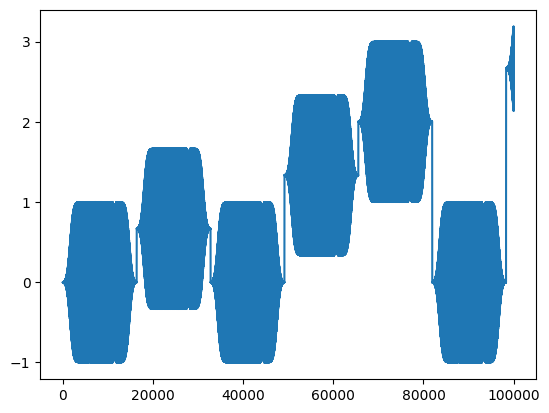

In [8]:
plt.plot(out.cantilever_excitation_waveform[0:100000])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.ndarray(3500, dtype=np.int8))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(out.SS_write_vec)

In [ ]:
def phase_shift_waveform(waveform, shift_radians):
    # get length of waveform
    n = len(waveform)
    
    # Convert the phase shift from radians to points
    shift_points = int(shift_radians / (2 * np.pi) * n) % n
    
    print(shift_points)

    # Apply the phase shift
    return np.roll(waveform, shift_points)


In [ ]:
import numpy as np

def generate_waveform(S, A, B, T, n, slope, phase_shift = None):
    n += 1

    # Lengths for each segment within the cycle
    length_up = (A - S)
    length_down = (A - B)
    length_return = (S - B)

    # Points for each segment within the cycle
    x_up = np.linspace(0, length_up, int(n * length_up / (length_up + length_down + length_return)))
    y_up = S + slope * x_up

    x_down = np.linspace(0, length_down, int(n * length_down / (length_up + length_down + length_return)))
    y_down = A - x_down

    x_return = np.linspace(0, length_return, int(n * length_return / (length_up + length_down + length_return)))
    y_return = B + x_return

    # Concatenate the points
    x_cycle = np.concatenate([x_up, x_up[-1] + x_down, x_up[-1] + x_down[-1] + x_return])
    y_cycle = np.concatenate([y_up, y_down, y_return])[:-1]
    
    if phase_shift is not None:
        y_cycle = phase_shift_waveform(y_cycle, phase_shift)

    # Repeat the cycle for T cycles
    waveform = np.tile(y_cycle, T)


    return waveform


In [ ]:
waveform = generate_waveform(S, A, B, T, n, slope, phase_shift = np.pi)

# Plot the waveform
plt.plot(waveform,)
plt.title('Linear Waveform with Constant Slope')
plt.xlabel('Points')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [ ]:
len(y_cycle)

In [ ]:
y_cycle

In [ ]:
import numpy as np

# Define the arrays
A = np.array([100, 200, 300, 400])
B = np.array([2, -1, 3, -2])

# Create a result array with enough space to accommodate all replications
result = np.zeros(len(A) * len(B), dtype=A.dtype)

# Replicate the entire array A at each B value
for i, offset in enumerate(A):
    start_idx = i * len(B)
    end_idx = start_idx + len(B)
    result[start_idx:end_idx] = B + offset

plt.plot(result)

